In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from coffea import util
from coffea.processor import accumulate
import os
import re
import pandas as pd
import hist
import matplotlib as mpl
import mplhep
import sys

sys.path.append("../analysisTools/")
import plotTools as ptools
import utils

In [2]:
#coffea output file
f_bkg = "../coffea/skimmed/HT_skimmed_WJets_2022.coffea"

#Nested Dictionary:
bkg_histo = util.load(f_bkg) [0]

cutNames = {cname:ptools.getCut(bkg_histo['cutDesc'][cname]) for cname in bkg_histo['cutDesc'].keys()}
print(cutNames)

cuts=cutNames.keys()
print("cuts:",cuts)
desc=list(cutNames.values())
print(desc)

{'all': 'No cuts', 'hasVtx': 'Baseline Selection', 'cut1': 'Pass MET Filters', 'cut2': 'HEM Veto', 'cut3': 'MET Trigger (120 GeV)', 'cut4': 'MET > 200 GeV', 'cut5': 'No b-tagged jets', 'cut6': 'Leading jet pT > 80 GeV', 'cut7': 'Leading jet |eta| < 2.4', 'cut8': 'dPhi(MET,leading jet) > 2.0', 'cut9': 'dPhi(MET,all jets) > 0.75', 'cut10': 'BDT'}
cuts: dict_keys(['all', 'hasVtx', 'cut1', 'cut2', 'cut3', 'cut4', 'cut5', 'cut6', 'cut7', 'cut8', 'cut9', 'cut10'])
['No cuts', 'Baseline Selection', 'Pass MET Filters', 'HEM Veto', 'MET Trigger (120 GeV)', 'MET > 200 GeV', 'No b-tagged jets', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'BDT']


In [3]:
#cutflow_cts: represents events yield in real CMS detector after applying cuts

cfd = bkg_histo['cutflow_cts']
#print("cutflow_cts:",cfd)   #cutflow_cts: reweighted by xsec cutflow_counts[cutName] = xsec*lumi*cutflow[cutName]

#Stores the fraction of events surviving each cut
effd = bkg_histo['cutflow']   #cutflow: efficiency = selected events / total events cutflow[cutName] += np.sum(events.genWgt)/sum_wgt
#print("cutflow:",effd)
    

In [4]:
#What do I need?
#I want to find ** for Nocuts of all the samples here.
#cutDesc: cut names
#cutflow: efficiency = selected events / total events cutflow[cutName] += np.sum(events.genWgt)/sum_wgt
#cutflow_cts: reweighted by xsec cutflow_counts[cutName] = xsec*lumi*cutflow[cutName]
#cutflow_nevts: raw counts cutflow_nevts[cutName] += len(events) -- will not be used.
#cutflow_vtx_matched: (for signal MC only) fraction that the selected vertex (lowest chi2) passes the truth-matching (gen-matching)

#nevents=raw number of events 100-- how many events pass cut X
#weight 

#cutflow_cts is a key in bkg_histo, which holds the number of events passing different selection cuts

In [5]:
#cutflow: the fraction of events surviving each cut
total_eff_dict = {cut: 0 for cut in cuts}
ceffd=bkg_histo["cutflow"]
ceff_dict = {k:0 for k in cuts} 

for c in cuts:
    for k in cfd.keys():
        ceff_dict[c] += ceffd[k][c]   
        #print(ceff_dict)

print ("ceff_dict:", ceff_dict)    

#ceff_dict is the dictionary that gives us the fraction of events surviving each cut

ceff_dict: {'all': 0.2907297044261355, 'hasVtx': 0.0064815170759127605, 'cut1': 0.0064815170759127605, 'cut2': 0.0064815170759127605, 'cut3': 0.0064815170759127605, 'cut4': 0.0064815170759127605, 'cut5': 0.0064815170759127605, 'cut6': 0.006470178655447652, 'cut7': 0.006425908717381849, 'cut8': 0.005516548744283297, 'cut9': 0.0018918636322086877, 'cut10': 8.655498935728332e-06}


['Baseline Selection', 'Pass MET Filters', 'HEM Veto', 'MET Trigger (120 GeV)', 'MET > 200 GeV', 'No b-tagged jets', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'BDT']


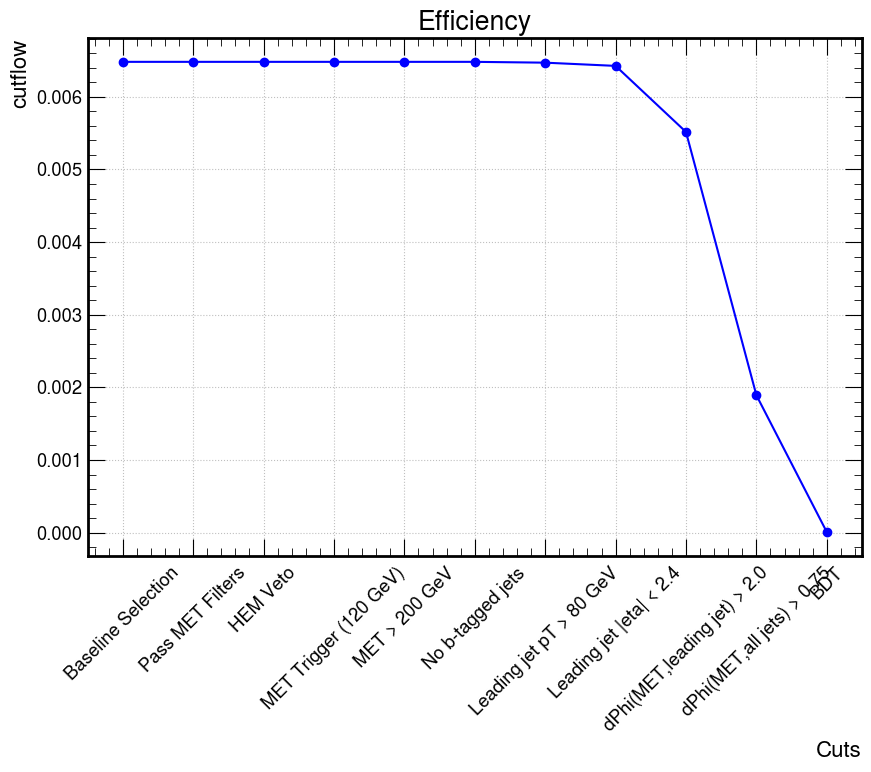

In [6]:
# Event yield after applying cuts (summed over the samples)

plt.figure(figsize=(9,8))
plt.title("Efficiency")

desc=list(cutNames.values())[1:]
print(desc)

cuts_eff = list(ceff_dict.keys())[1:] 
values_eff = list(ceff_dict.values())[1:] 

plt.plot(desc, values_eff, marker='o', linestyle='-', color='b', label='Cut flow')

#plt.yscale('log')

plt.xlabel('Cuts')
plt.ylabel('cutflow')
plt.xticks(rotation=45)  # Rotate cut labels for better readability
plt.grid(True)

plt.tight_layout()
plt.savefig("Efficiency.png") 
plt.show()

In [7]:
#cutflow_cts: represents events yield in real CMS detector after applying cuts
total_cts_dict = {cut: 0 for cut in cuts}
cfd=bkg_histo["cutflow_cts"]
cts_dict = {k:0 for k in cuts}  #cts dict is initialized as a dictionary with: Each cut name as a key and the initial value set to 0.

# for k in cfd.keys():#loops over sample names
#     for c in cuts:#loops over cut names
#         cts_dict[c] += cfd[k][c]   #cfd[k][c] retrieves the number of events that passed cut c for sample k    
#         print(f'\n:{k}  xsec * lumi * eff at {cutNames[c]} = {cts_dict[c]}')  

for c in cuts:
    for k in cfd.keys():
        cts_dict[c] += cfd[k][c]   #cfd[k][c] retrieves the number of events that passed cut c for sample k    
        #print(f'\n:{k}  xsec * lumi * eff at {cutNames[c]} = {cts_dict[c]}')  
        #print(cts_dict)

print ("cts_dict:", cts_dict)    

#cts_dict is the dictionary that gives us the event yield after applying a cut.

cts_dict: {'all': 203931.32875659928, 'hasVtx': 9708.097673112305, 'cut1': 9708.097673112305, 'cut2': 9708.097673112305, 'cut3': 9708.097673112305, 'cut4': 9708.097673112305, 'cut5': 9708.097673112305, 'cut6': 9460.34828702284, 'cut7': 8914.586701479131, 'cut8': 8736.6949337505, 'cut9': 6822.816595094071, 'cut10': 45.682514908402695}


In [8]:
# df = pd.DataFrame(list(main_dict.items()), columns=['Cut Name', 'Value'])
# print(df)

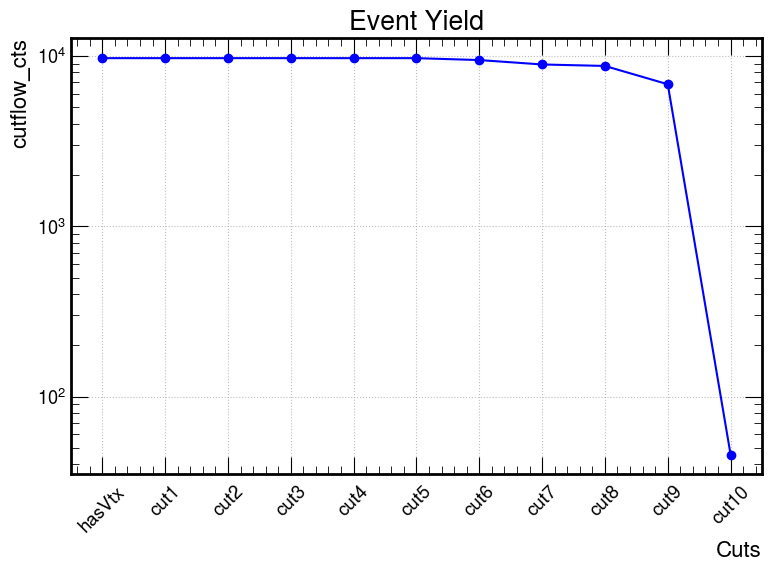

In [9]:
# Event yield after applying cuts (summed over the samples)

plt.figure(figsize=(8,6))
plt.title("Event Yield")

cuts = list(cts_dict.keys())[1:] 
values = list(cts_dict.values())[1:] 

plt.plot(cuts, values, marker='o', linestyle='-', color='b', label='Cut flow')

plt.yscale('log')

plt.xlabel('Cuts')
plt.ylabel('cutflow_cts')
plt.xticks(rotation=45)  # Rotate cut labels for better readability
plt.grid(True)

plt.tight_layout()
plt.savefig("Event yield.png") 
plt.show()